In [1]:
!pip install geopandas==1.0.0a1

In [2]:
import numpy as np
import pandas as pd
import geopandas as geopd

from ast import literal_eval

from shapely import Polygon, wkt
from pyproj import CRS

import matplotlib.pyplot as plt

import contextily as cx

In [3]:
def load_dataframe(file_path: str):
    # read file
    df = pd.read_csv(file_path, index_col=0)

    # eval columns
    for col in df.columns:
        try:
            df[col] = df[col].apply(literal_eval)
        except:
            pass

    # read polygon
    if "polygon" in df.columns:
        df["polygon"] = df["polygon"].apply(
            lambda x: x if isinstance(x, Polygon) else wkt.loads(x)
        )
    else:
        df["polygon"] = df["coordinates"].apply(
            lambda x: Polygon.from_bounds(*x)
        )

    # convert to geo dataframe
    df = geopd.GeoDataFrame(df, geometry="polygon", crs="EPSG:4326")

    return df

## Load data

In [4]:
railspace_uk = load_dataframe("../../../../all_models/MapReader_Outputs_SIGSPATIAL_2022/predictions_railspace_geo.csv")
building_uk = load_dataframe("../../../../all_models/MapReader_Outputs_SIGSPATIAL_2022/predictions_building_geo.csv")

In [5]:
metadata = load_dataframe("../../../../all_models/MapReader_Outputs_SIGSPATIAL_2022/metadata.csv")

In [6]:
railspace_uk.head()

,pixel_bounds,center_lon,center_lat,pred,predicted_label,conf,mean_pixel_RGB,std_pixel_RGB,mean_pixel_A,parent_id,...,dist2rail,dist2quicks_km,dist2rail_km,dist2rail_minus_station,dist2quicks_km_quantized,dist2rail_km_quantized,dist2rail_minus_station_quantized,coordinates,crs,polygon
image_id,,,,,,,,,,,,,,,,,,,,,
patch-3014-0-3151-137-#map_100890251.png#.PNG,"(3014, 0, 3151, 137)",-0.401106,52.612608,1,railspace,0.989898,0.845034,0.166807,1.0,map_100890251.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(-0.4018356095499067, 52.612160595069305, -0.4...",EPSG:4326,"POLYGON ((-0.40038 52.61216, -0.40038 52.61305..."
patch-2740-2603-2877-2740-#map_100890251.png#.PNG,"(2740, 2603, 2877, 2740)",-0.404026,52.595615,1,railspace,0.999866,0.825524,0.171573,1.0,map_100890251.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(-0.404756005130597, 52.595168053797, -0.40329...",EPSG:4326,"POLYGON ((-0.4033 52.59517, -0.4033 52.59606, ..."
patch-2740-2466-2877-2603-#map_100890251.png#.PNG,"(2740, 2466, 2877, 2603)",-0.404026,52.596510,1,railspace,0.999999,0.812739,0.172991,1.0,map_100890251.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(-0.404756005130597, 52.596062398074494, -0.40...",EPSG:4326,"POLYGON ((-0.4033 52.59606, -0.4033 52.59696, ..."
patch-2740-2329-2877-2466-#map_100890251.png#.PNG,"(2740, 2329, 2877, 2466)",-0.404026,52.597404,1,railspace,1.000000,0.856458,0.146484,1.0,map_100890251.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(-0.404756005130597, 52.596956742351985, -0.40...",EPSG:4326,"POLYGON ((-0.4033 52.59696, -0.4033 52.59785, ..."
patch-2603-2329-2740-2466-#map_100890251.png#.PNG,"(2603, 2329, 2740, 2466)",-0.405486,52.597404,1,railspace,1.000000,0.859919,0.137087,1.0,map_100890251.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(-0.4062162029209422, 52.596956742351985, -0.4...",EPSG:4326,"POLYGON ((-0.40476 52.59696, -0.40476 52.59785..."


In [7]:
building_uk.head()

,pixel_bounds,center_lon,center_lat,pred,predicted_label,conf,mean_pixel_RGB,std_pixel_RGB,mean_pixel_A,parent_id,...,dist2rail,dist2quicks_km,dist2rail_km,dist2rail_minus_station,dist2quicks_km_quantized,dist2rail_km_quantized,dist2rail_minus_station_quantized,coordinates,crs,polygon
image_id,,,,,,,,,,,,,,,,,,,,,
patch-1781-2740-1918-2877-#map_100890251.png#.PNG,"(1781, 2740, 1918, 2877)",-0.414247,52.594721,2,building,0.999997,0.862014,0.128359,1.0,map_100890251.png,...,645.380825,1.878209,0.645381,1.232828,1.5,0.5,1.0,"(-0.41497738966301306, 52.59427370951951, -0.4...",EPSG:4326,"POLYGON ((-0.41352 52.59427, -0.41352 52.59517..."
patch-5754-2603-5891-2740-#map_100890251.png#.PNG,"(5754, 2603, 5891, 2740)",-0.371902,52.595615,2,building,0.999994,0.857251,0.135703,1.0,map_100890251.png,...,1808.006157,1.977498,1.808006,0.169492,1.5,1.5,0.0,"(-0.3726316537430037, 52.595168053797, -0.3711...",EPSG:4326,"POLYGON ((-0.37117 52.59517, -0.37117 52.59606..."
patch-5617-2603-5754-2740-#map_100890251.png#.PNG,"(5617, 2603, 5754, 2740)",-0.373362,52.595615,2,building,0.999998,0.833065,0.167445,1.0,map_100890251.png,...,1723.635623,1.905760,1.723636,0.182125,1.5,1.5,0.0,"(-0.3740918515333489, 52.595168053797, -0.3726...",EPSG:4326,"POLYGON ((-0.37263 52.59517, -0.37263 52.59606..."
patch-1918-2603-2055-2740-#map_100890251.png#.PNG,"(1918, 2603, 2055, 2740)",-0.412787,52.595615,2,building,1.000000,0.827439,0.170197,1.0,map_100890251.png,...,528.046116,1.874569,0.528046,1.346523,1.5,0.5,1.0,"(-0.4135171918726679, 52.595168053797, -0.4120...",EPSG:4326,"POLYGON ((-0.41206 52.59517, -0.41206 52.59606..."
patch-1781-2603-1918-2740-#map_100890251.png#.PNG,"(1781, 2603, 1918, 2740)",-0.414247,52.595615,2,building,0.999984,0.854300,0.145580,1.0,map_100890251.png,...,626.149190,1.945213,0.626149,1.319063,1.5,0.5,1.0,"(-0.41497738966301306, 52.595168053797, -0.413...",EPSG:4326,"POLYGON ((-0.41352 52.59517, -0.41352 52.59606..."


In [8]:
metadata.head()

,url,published_date,region,coordinates,crs,shape,polygon
name,,,,,,,
map_75831988.png,https://maps.nls.uk/view/75831988,1904.0,Inverness-shire - Mainland IIa (inset IIb),"(-4.910888671875, 57.48187983904037, -4.748840...",EPSG:4326,"(8525, 15100, 3)","POLYGON ((-4.91089 57.48188, -4.91089 57.54089..."
map_75719866.png,https://maps.nls.uk/view/75719866,1901.0,Aberdeenshire CIV (inset CIIIa),"(-3.79302978515625, 56.8970039212726, -3.63372...",EPSG:4326,"(9792, 13923, 3)","POLYGON ((-3.79303 56.897, -3.79303 56.95546, ..."
map_101600625.png,https://maps.nls.uk/view/101600625,1883.0,Derbyshire XXIII.SW,"(-1.77978515625, 53.196161199542864, -1.705627...",EPSG:4326,"(4600, 6900, 3)","POLYGON ((-1.77979 53.19616, -1.77979 53.22577..."
map_102344374.png,https://maps.nls.uk/view/102344374,1896.0,Yorkshire LXV,"(-2.33734130859375, 54.27003608961074, -2.1862...",EPSG:4326,"(9200, 14100, 3)","POLYGON ((-2.33734 54.27004, -2.33734 54.32774..."
map_101602986.png,https://maps.nls.uk/view/101602986,1884.0,Nottinghamshire XXXIV.NE,"(-0.9832763671875, 53.052770983746875, -0.9118...",EPSG:4326,"(4400, 6700, 3)","POLYGON ((-0.98328 53.05277, -0.98328 53.08083..."


## Plot predictions

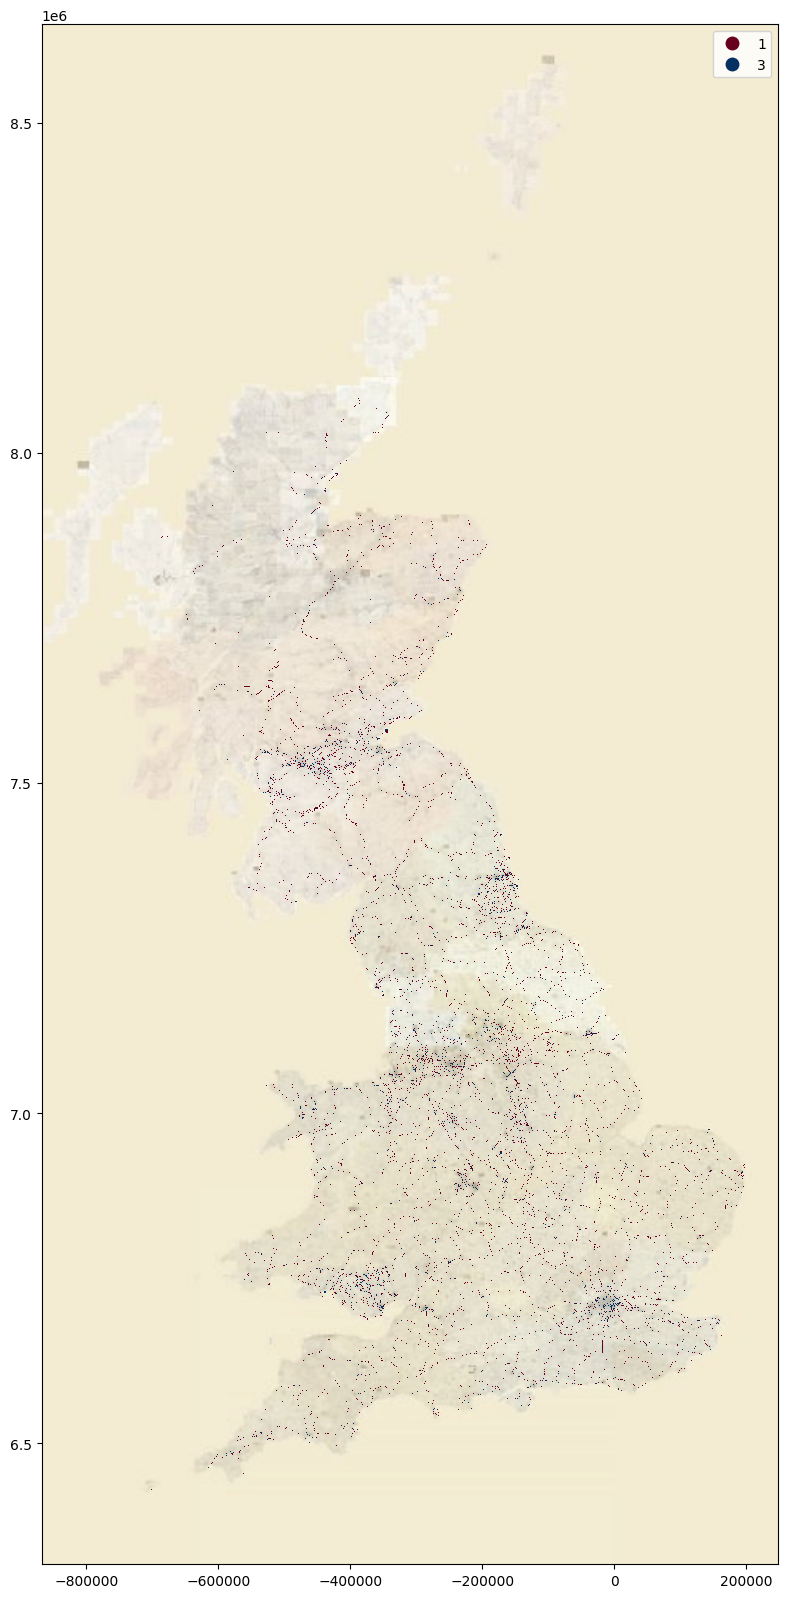

In [9]:
fig, ax = plt.subplots(figsize=(20,20))

railspace_uk_wm = railspace_uk.to_crs(epsg=3857)
railspace_uk_wm.plot("pred", ax=ax, legend=True, categorical=True, cmap="RdBu")
cx.add_basemap(ax=ax, crs=3857, source="https://api.maptiler.com/tiles/uk-osgb10k1888/{z}/{x}/{y}.jpg?key=uZV86JxJQOHqWjz4QFan")

## Calculate coverage

In [11]:
geod = CRS("EPSG:4326").get_geod() # create Geod for area/distance calculations

In [13]:
# UK_AREA = 2.44376e+11 # m^2

all_poly = metadata["polygon"].union_all()
UK_AREA, _ = geod.geometry_area_perimeter(all_poly)

In [15]:
railspace_poly = railspace_uk["polygon"].union_all()
railspace_area, _ = geod.geometry_area_perimeter(railspace_poly)

In [16]:
print(f"Railspace exists on {abs(railspace_area):.0f} m^2 of patches")
print(f"Railspace patches covers {abs(railspace_area / UK_AREA):.2%} of UK")

Railspace exists on 4570321093 m^2 of patches
Railspace patches covers 1.75% of UK


In [18]:
building_poly = building_uk["polygon"].union_all() # note: this takes a while to run
building_area, _ = geod.geometry_area_perimeter(building_poly)

In [19]:
print(f"Buildings exist on {abs(building_area):.0f} m^2 of patches")
print(f"Buildings patches cover {abs(building_area / UK_AREA):.2%} of UK")

Buildings exist on 17811089730 m^2 of patches
Buildings patches cover 6.83% of UK


In [20]:
railspace_building_poly = railspace_poly.intersection(building_poly)
railspace_building_area, _ = geod.geometry_area_perimeter(railspace_building_poly)

In [21]:
print(f"Railspace and buildings share {abs(railspace_building_area):.0f} m^2 of patches")
print(f"Railspace and building patches cover {abs(railspace_building_area / UK_AREA):.2%} of UK")

Railspace and buildings share 1107006325 m^2 of patches
Railspace and building patches cover 0.42% of UK


## Clustering

In [12]:
from tqdm.notebook import tqdm

In [13]:
# convert to british national grid and find central point
railspace_uk_27700 = railspace_uk.to_crs(epsg=27700)
railspace_uk_27700["centroid"]  = railspace_uk_27700["polygon"].apply(lambda x: x.centroid)
railspace_uk_27700.set_geometry("centroid", inplace=True)

# find indices of patches within 200m, 500m, 1km and 2km of each other
max_dists = [200, 500, 1000, 2000]
indices = {}

for d in tqdm(max_dists):
    indices[d] = railspace_uk_27700.sindex.query(railspace_uk_27700.geometry, predicate="dwithin", distance=d).T
    
    # remove duplicates (i.e. [1, 2] and [2, 1])
    indices[d].sort(axis=1)
    indices[d] = np.unique(indices[d], axis=0)

  0%|          | 0/4 [00:00<?, ?it/s]

In [15]:
print(f"Total number of patches: {len(railspace_uk):,}")

Total number of patches: 487,291


In [22]:
print(*[f"Number of patches within {d}m: {len(indices[d])-len(railspace_uk):,}" for d in max_dists], sep="\n")

Number of patches within 200m: 1,349,026
Number of patches within 500m: 4,877,566
Number of patches within 1000m: 12,453,453
Number of patches within 2000m: 32,554,281


In [24]:
print(*[f"Proportion of patches within {d}m: {(len(indices[d])-len(railspace_uk))/len(railspace_uk):.2%}" for d in max_dists], sep="\n")

Proportion of patches within 200m: 276.84%
Proportion of patches within 500m: 1000.96%
Proportion of patches within 1000m: 2555.65%
Proportion of patches within 2000m: 6680.67%


### At parent level

In [14]:
for id, count in railspace_uk.aggregate("parent_id").value_counts().items():
    metadata.loc[id, "count"] = count

In [15]:
for id, count in railspace_uk.aggregate("parent_id").value_counts().items():
    metadata.loc[id, "railspace_count"] = count

In [16]:
for id, count in building_uk.aggregate("parent_id").value_counts().items():
    metadata.loc[id, "building_count"] = count

In [18]:
metadata.fillna({"railspace_count":0, "building_count":0}, inplace=True)

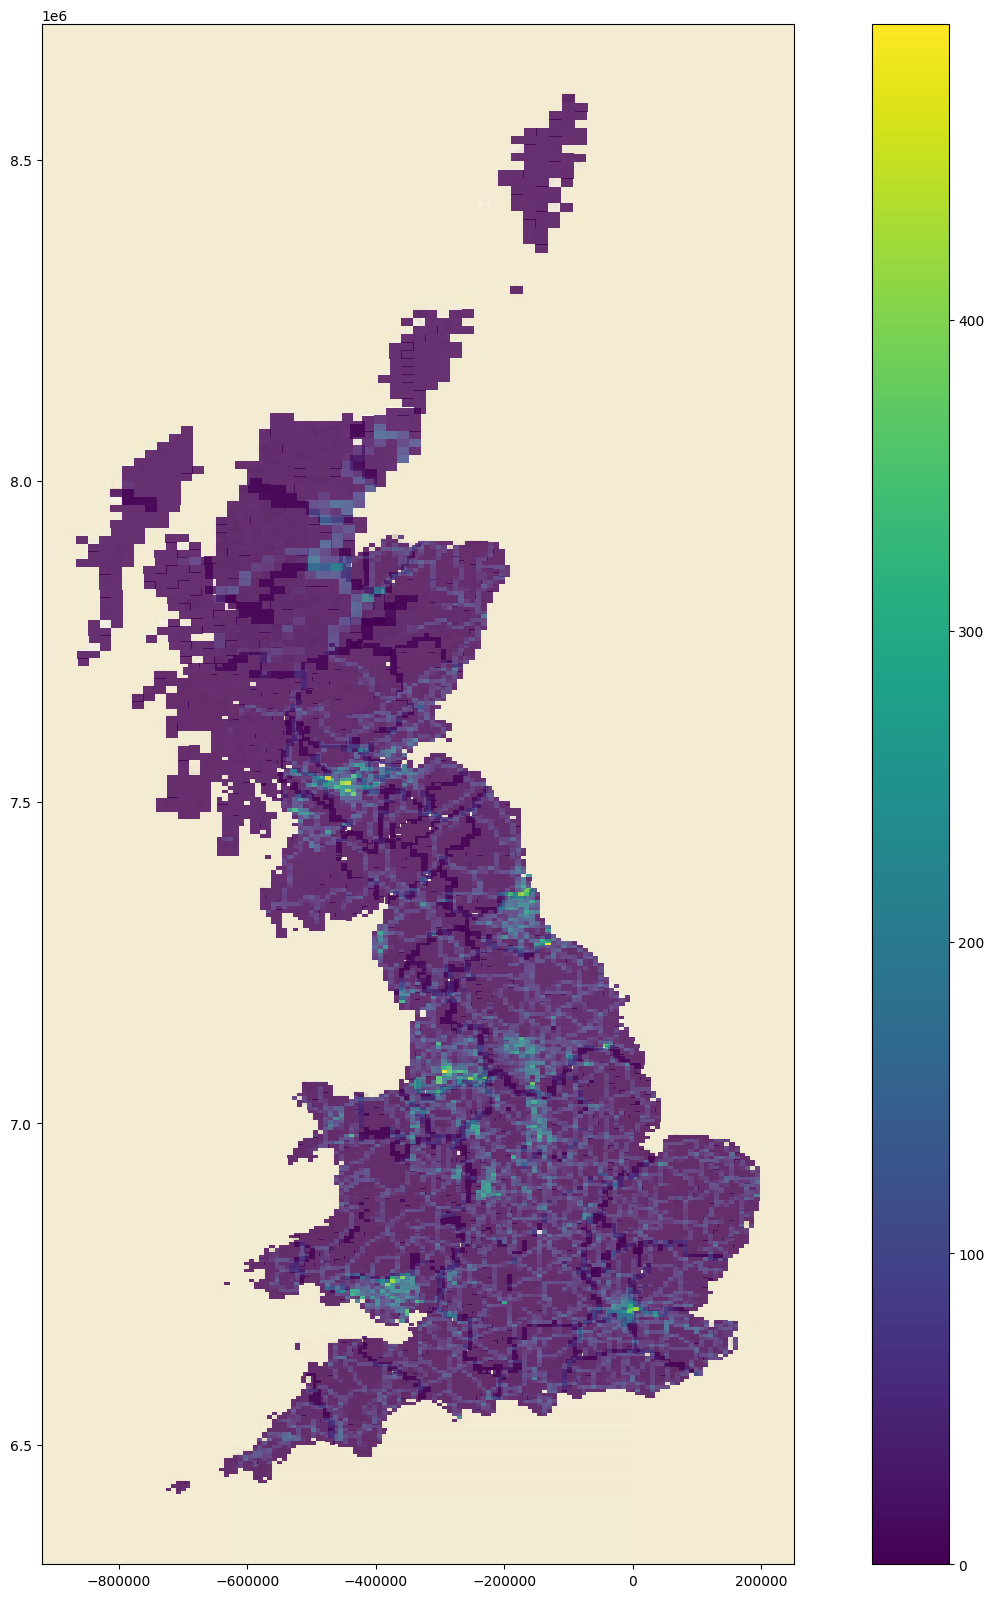

In [19]:
fig, ax = plt.subplots(figsize=(20,20))

metadata_wm = metadata.to_crs(epsg=3857)
metadata_wm.plot("railspace_count", ax=ax, legend=True, alpha=0.8)
cx.add_basemap(ax=ax, crs=3857, source="https://api.maptiler.com/tiles/uk-osgb10k1888/{z}/{x}/{y}.jpg?key=uZV86JxJQOHqWjz4QFan")

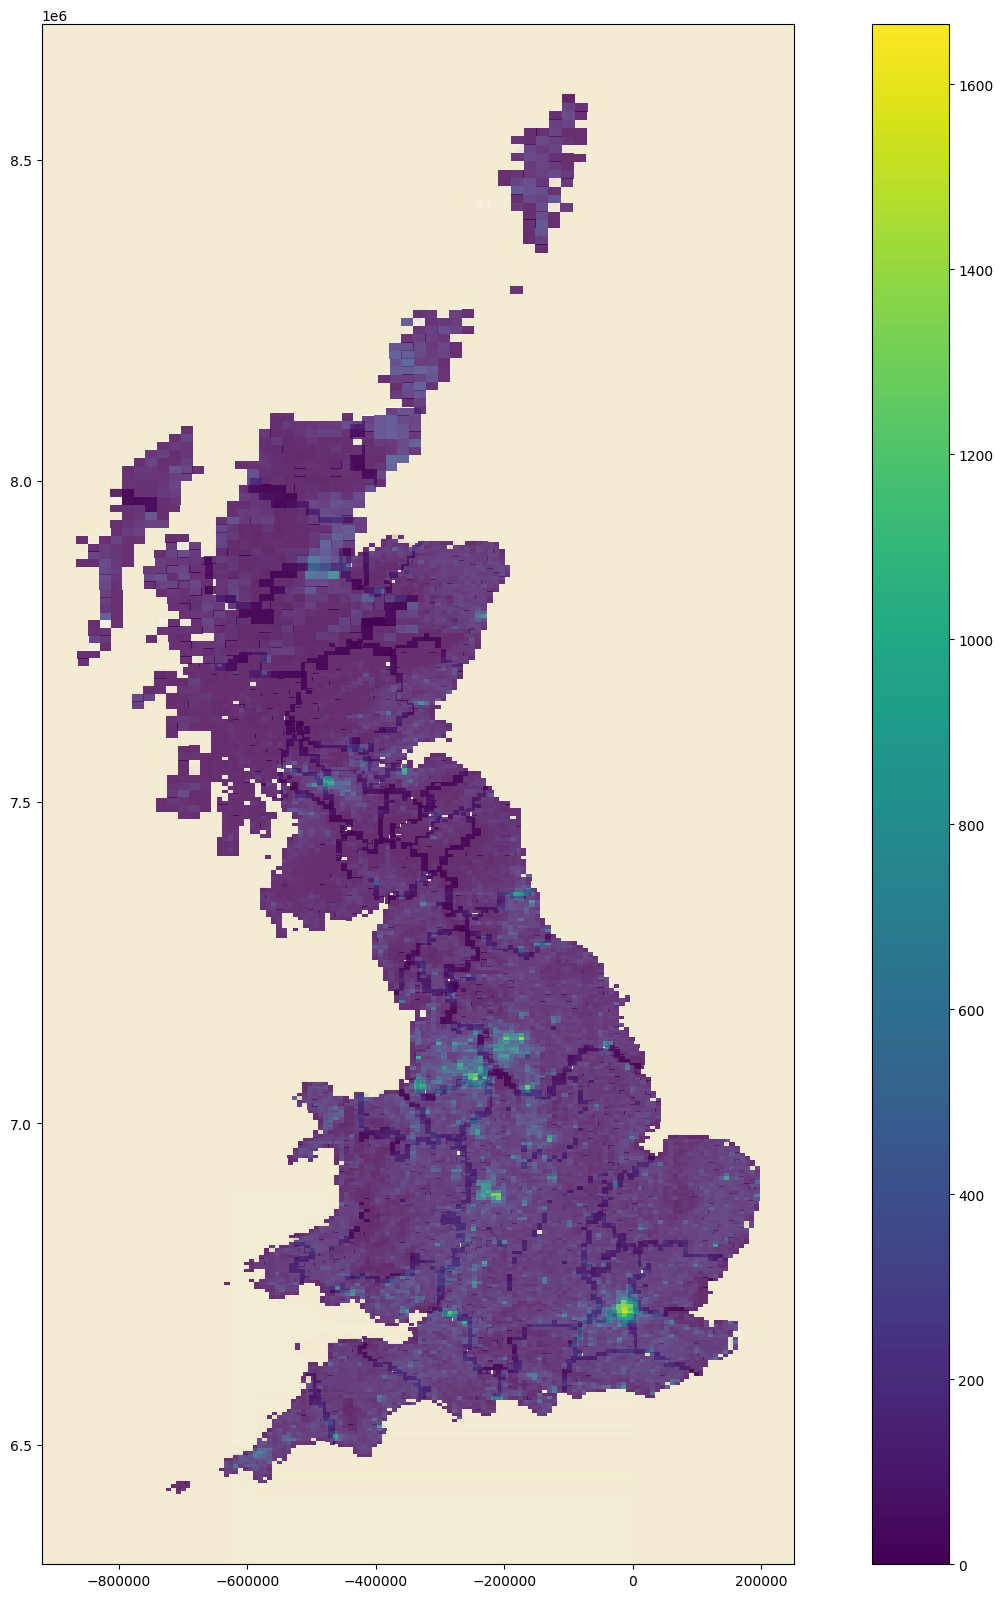

In [20]:
fig, ax = plt.subplots(figsize=(20,20))

metadata_wm.plot("building_count", ax=ax, legend=True, alpha=0.8)
cx.add_basemap(ax=ax, crs=3857, source="https://api.maptiler.com/tiles/uk-osgb10k1888/{z}/{x}/{y}.jpg?key=uZV86JxJQOHqWjz4QFan")